In [1]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='gAT0bIZPTpIWUyZTxqKk6LZJmrjQExE15AXQmPJtqSeG',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'earlydetectionofchronickidneydise-donotdelete-pr-257txtfmjjystw'
object_key = 'chronickidneydisease.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [2]:
#************************************************* MODEL CREATION **************************************************************
#importing necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
#checking size of the dataset
df.shape

(400, 26)

In [4]:
#fetching info about columns in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [5]:
#checking the value counts
for column in  df.columns:
    print(df[column].value_counts(),end="\n")

0      1
263    1
273    1
272    1
271    1
      ..
130    1
129    1
128    1
127    1
399    1
Name: id, Length: 400, dtype: int64
60.0    19
65.0    17
48.0    12
55.0    12
50.0    12
        ..
83.0     1
27.0     1
14.0     1
81.0     1
79.0     1
Name: age, Length: 76, dtype: int64
80.0     116
70.0     112
60.0      71
90.0      53
100.0     25
50.0       5
110.0      3
140.0      1
180.0      1
120.0      1
Name: bp, dtype: int64
1.020    106
1.010     84
1.025     81
1.015     75
1.005      7
Name: sg, dtype: int64
0.0    199
1.0     44
2.0     43
3.0     43
4.0     24
5.0      1
Name: al, dtype: int64
0.0    290
2.0     18
3.0     14
4.0     13
1.0     13
5.0      3
Name: su, dtype: int64
normal      201
abnormal     47
Name: rbc, dtype: int64
normal      259
abnormal     76
Name: pc, dtype: int64
notpresent    354
present        42
Name: pcc, dtype: int64
notpresent    374
present        22
Name: ba, dtype: int64
99.0     10
93.0      9
100.0     9
107.0     8
131.0     6

In [6]:
#refactoring the dataset by replacing valid data
df.replace(to_replace="\tno",
           value="no",inplace=True)
df.replace(to_replace="\tyes",
           value="yes",inplace=True)
df.replace(to_replace=" yes",
           value="yes",inplace=True)
df.replace(to_replace="ckd\t",
           value="ckd",inplace=True)
df.replace(to_replace="\t43",
           value="43",inplace=True)
df.replace({'\t?': None},inplace=True)
df.replace(to_replace="\t6200",
           value="6200",inplace=True)
df.replace(to_replace="\t8400",
           value="8400",inplace=True)


In [7]:
#checking the value counts after refactoring 
for column in  df.columns:
    print(df[column].value_counts(),end="\n")

0      1
263    1
273    1
272    1
271    1
      ..
130    1
129    1
128    1
127    1
399    1
Name: id, Length: 400, dtype: int64
60.0    19
65.0    17
48.0    12
55.0    12
50.0    12
        ..
83.0     1
27.0     1
14.0     1
81.0     1
79.0     1
Name: age, Length: 76, dtype: int64
80.0     116
70.0     112
60.0      71
90.0      53
100.0     25
50.0       5
110.0      3
140.0      1
180.0      1
120.0      1
Name: bp, dtype: int64
1.020    106
1.010     84
1.025     81
1.015     75
1.005      7
Name: sg, dtype: int64
0.0    199
1.0     44
2.0     43
3.0     43
4.0     24
5.0      1
Name: al, dtype: int64
0.0    290
2.0     18
3.0     14
4.0     13
1.0     13
5.0      3
Name: su, dtype: int64
normal      201
abnormal     47
Name: rbc, dtype: int64
normal      259
abnormal     76
Name: pc, dtype: int64
notpresent    354
present        42
Name: pcc, dtype: int64
notpresent    374
present        22
Name: ba, dtype: int64
99.0     10
93.0      9
100.0     9
107.0     8
131.0     6

In [8]:
#checking if there is any null values in descending order
df.isnull().sum().sort_values(ascending=False)

rbc               152
rc                131
wc                106
pot                88
sod                87
pcv                71
pc                 65
hemo               52
su                 49
sg                 47
al                 46
bgr                44
bu                 19
sc                 17
bp                 12
age                 9
ba                  4
pcc                 4
htn                 2
dm                  2
cad                 2
ane                 1
appet               1
pe                  1
id                  0
classification      0
dtype: int64

In [9]:
#converting the misinterpreted data types to valid one
df['pcv']=df['pcv'].astype('float64')
df['wc']=df['wc'].astype('float64')
df['rc']=df['rc'].astype('float64')

In [10]:
#checking the info to see the changes in data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             329 non-null    float64
 17  wc              294 non-null    flo

In [11]:
#replacing null values with modes for categorical column
#and replacing null values with median for nominal column 

df['age'].fillna(df['age'].median(),inplace=True)
df['bp'].fillna(df['bp'].median(),inplace=True)
df['sg'].fillna(df['sg'].median(),inplace=True)
df['al'].fillna(df['al'].median(),inplace=True)
df['su'].fillna(df['su'].median(),inplace=True)
df['rbc'].fillna(df['rbc'].mode()[0],inplace=True)
df['pc'].fillna(df['pc'].mode()[0],inplace=True)
df['pcc'].fillna(df['pcc'].mode()[0],inplace=True)
df['ba'].fillna(df['ba'].mode()[0],inplace=True)
df['bgr'].fillna(df['bgr'].median(),inplace=True)
df['bu'].fillna(df['bu'].median(),inplace=True)
df['sc'].fillna(df['sc'].median(),inplace=True)
df['sod'].fillna(df['sod'].median(),inplace=True)
df['pot'].fillna(df['pot'].median(),inplace=True)
df['hemo'].fillna(df['hemo'].median(),inplace=True)
df['pcv'].fillna(df['pcv'].median(),inplace=True)
df['wc'].fillna(df['wc'].median(),inplace=True)
df['rc'].fillna(df['rc'].median(),inplace=True)
df['htn'].fillna(df['htn'].mode()[0],inplace=True)
df['dm'].fillna(df['dm'].mode()[0],inplace=True)
df['cad'].fillna(df['cad'].mode()[0],inplace=True)
df['appet'].fillna(df['appet'].mode()[0],inplace=True)
df['pe'].fillna(df['pe'].mode()[0],inplace=True)
df['ane'].fillna(df['ane'].mode()[0],inplace=True)

In [12]:
df.isnull().sum() #checking if there is any null values present

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [13]:
#finding out numerical column filtering out from categorical column

num_cols=list(df.select_dtypes(['float64']))
num_cols

['age',
 'bp',
 'sg',
 'al',
 'su',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'pcv',
 'wc',
 'rc']

In [14]:
#describing the dataset 
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
count,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000
mean,199.500000,51.562500,76.575000,1.017712,0.90000,0.395000,145.062500,56.693000,2.997125,137.631250,4.577250,12.54250,39.082500,8298.500000,4.737750
std,115.614301,16.982996,13.489785,0.005434,1.31313,1.040038,75.260774,49.395258,5.628886,9.206332,2.821357,2.71649,8.162245,2529.593814,0.841439
min,0.000000,2.000000,50.000000,1.005000,0.00000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.10000,9.000000,2200.000000,2.100000
25%,99.750000,42.000000,70.000000,1.015000,0.00000,0.000000,101.000000,27.000000,0.900000,135.000000,4.000000,10.87500,34.000000,6975.000000,4.500000
50%,199.500000,55.000000,80.000000,1.020000,0.00000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.65000,40.000000,8000.000000,4.800000
75%,299.250000,64.000000,80.000000,1.020000,2.00000,0.000000,150.000000,61.750000,2.725000,141.000000,4.800000,14.62500,44.000000,9400.000000,5.100000
max,399.000000,90.000000,180.000000,1.025000,5.00000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.80000,54.000000,26400.000000,8.000000


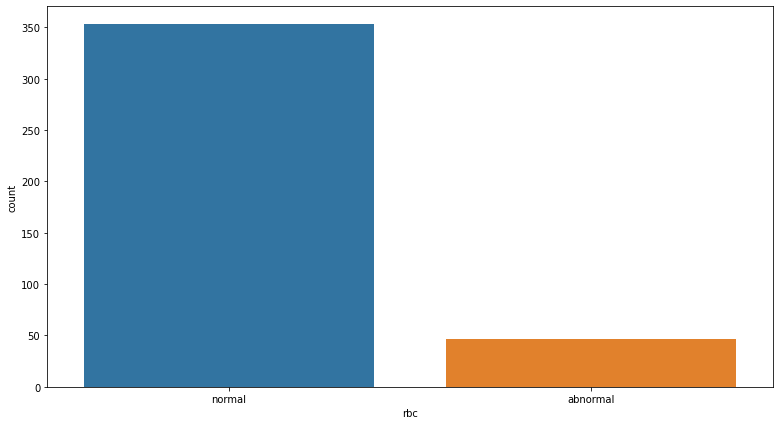

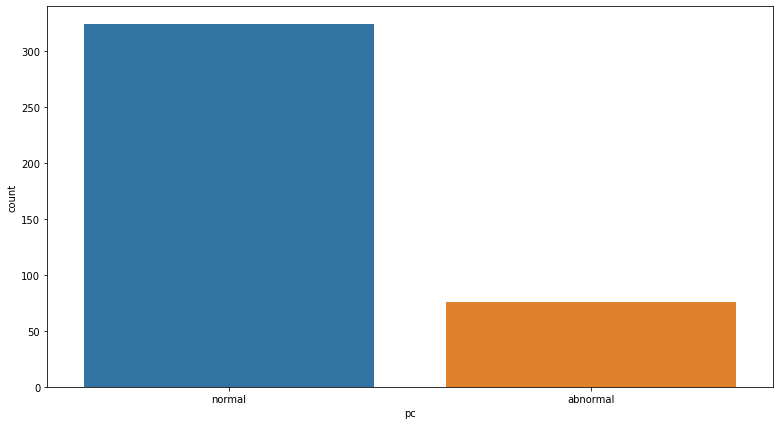

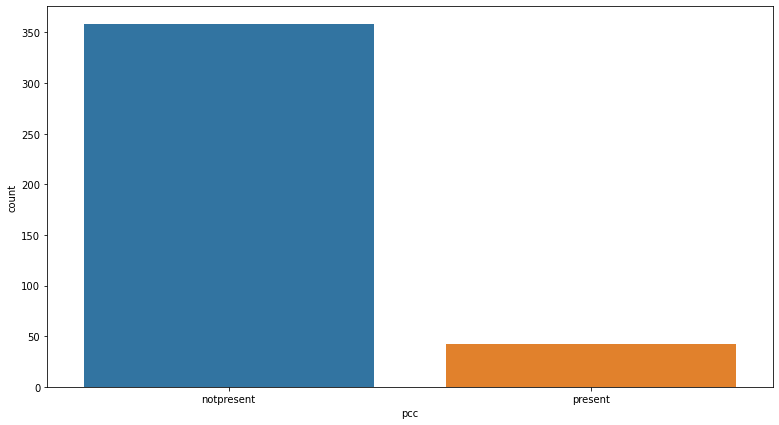

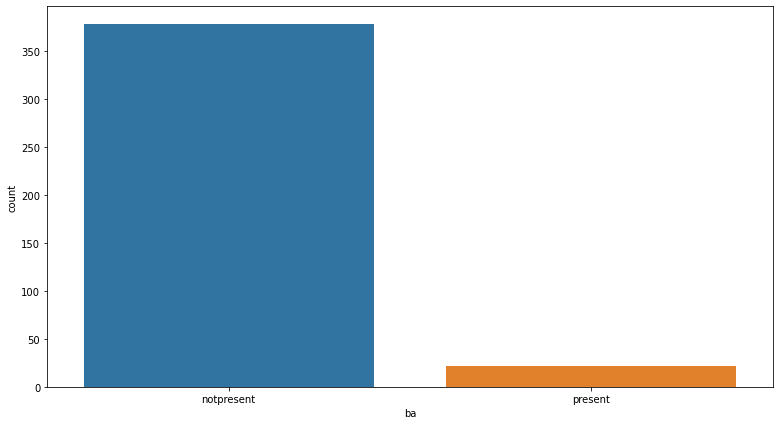

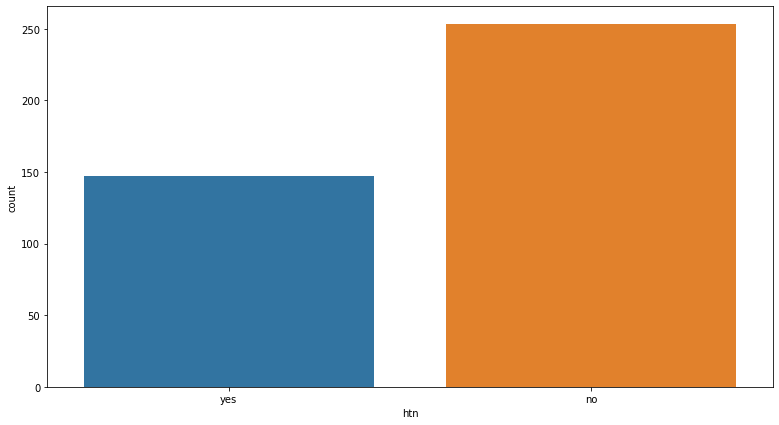

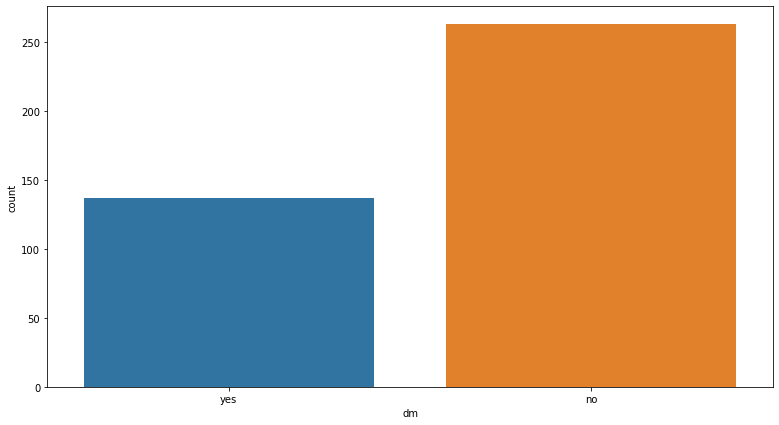

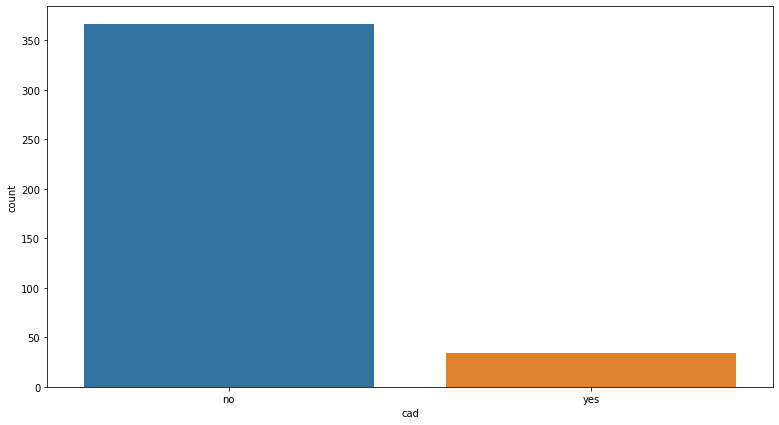

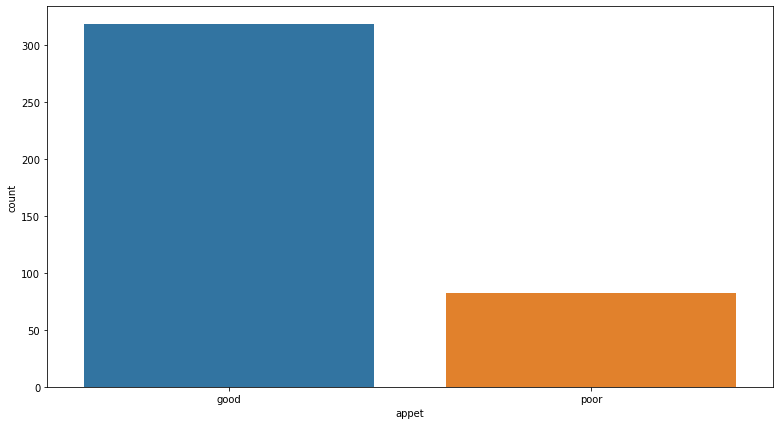

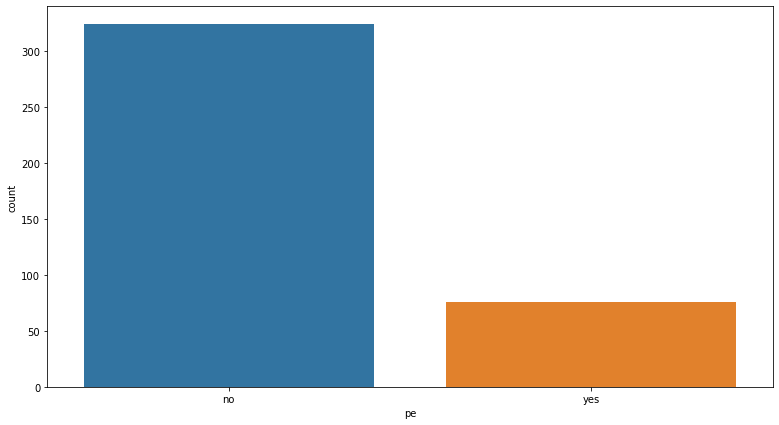

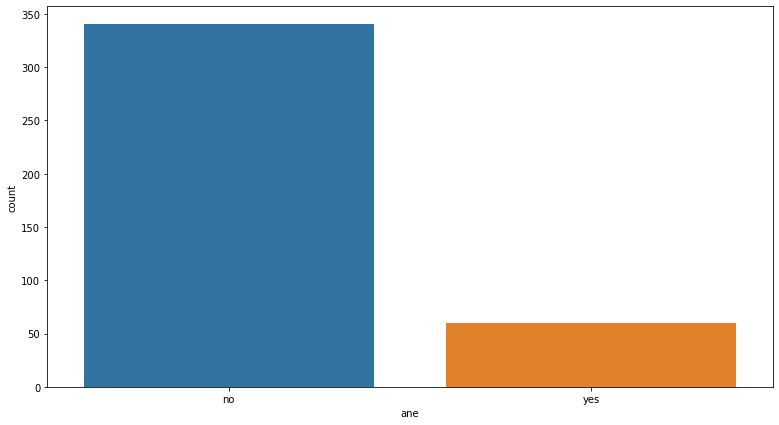

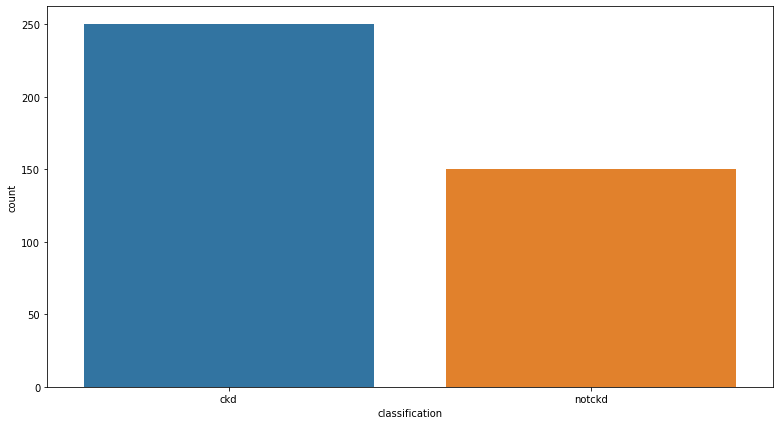

In [15]:
#univariate analysis

import matplotlib.pyplot as plt
for col in df[['rbc','pc','pcc','ba','htn','dm','cad','appet','pe','ane','classification']]:
      fig= plt.subplots(1,1, figsize = (13,7))
      sns.countplot(x=df[col])

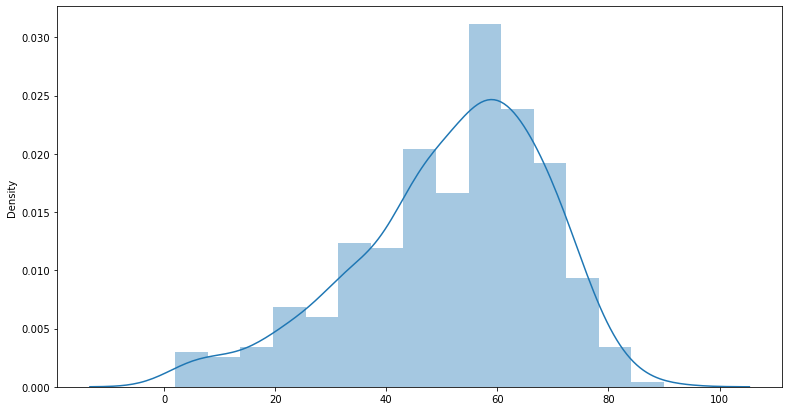

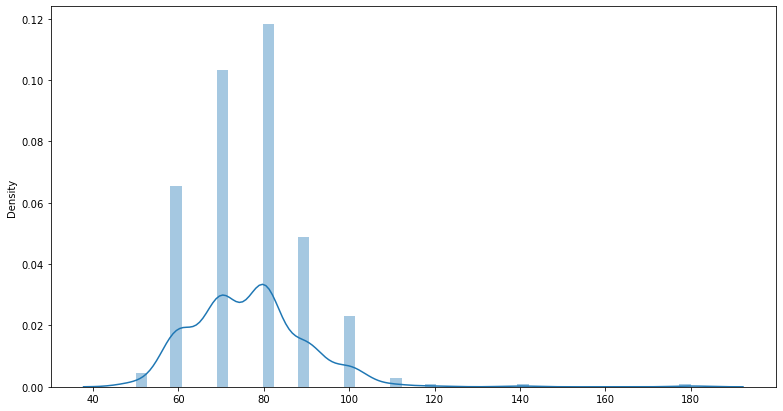

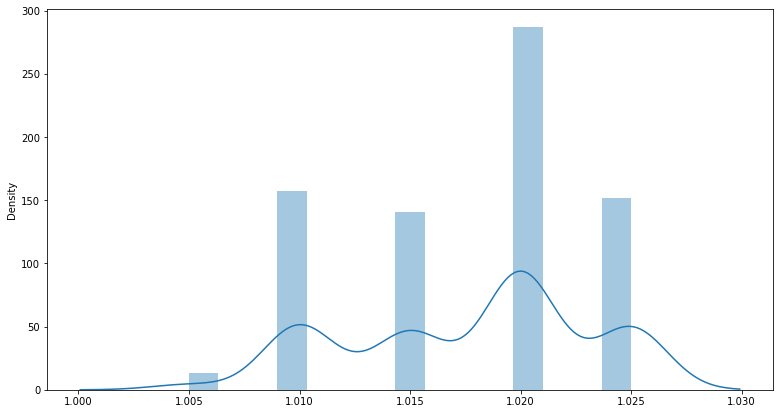

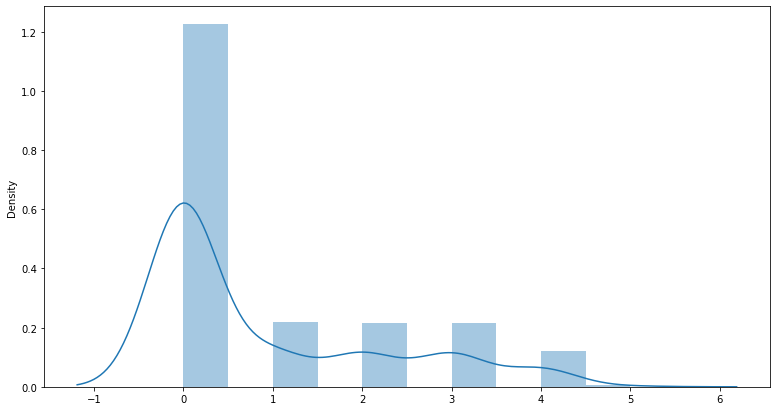

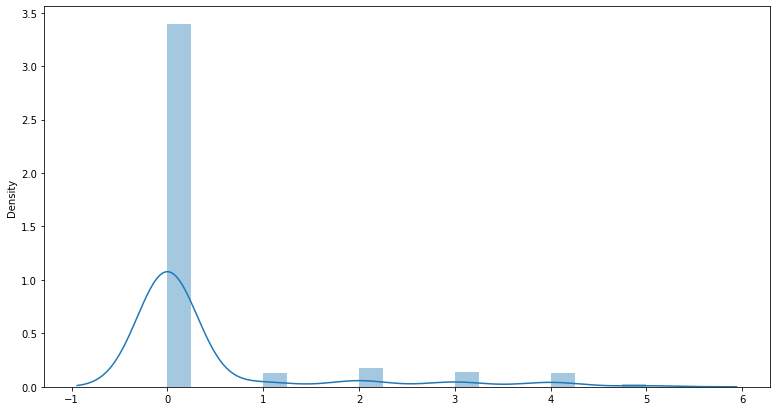

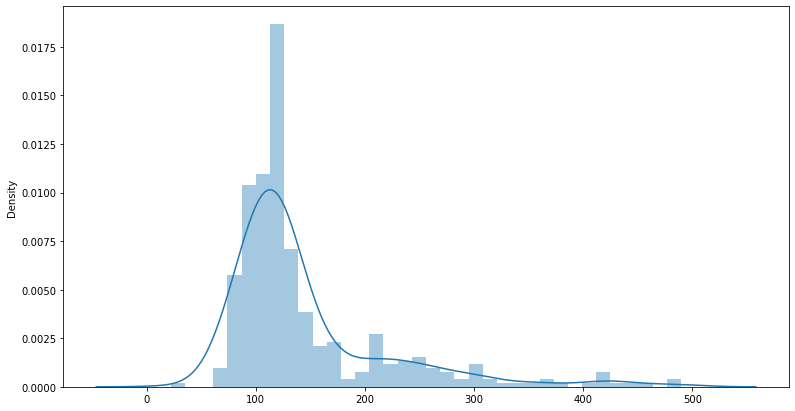

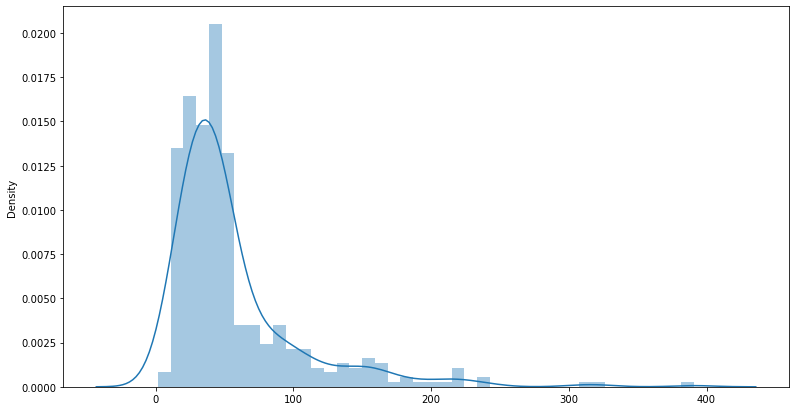

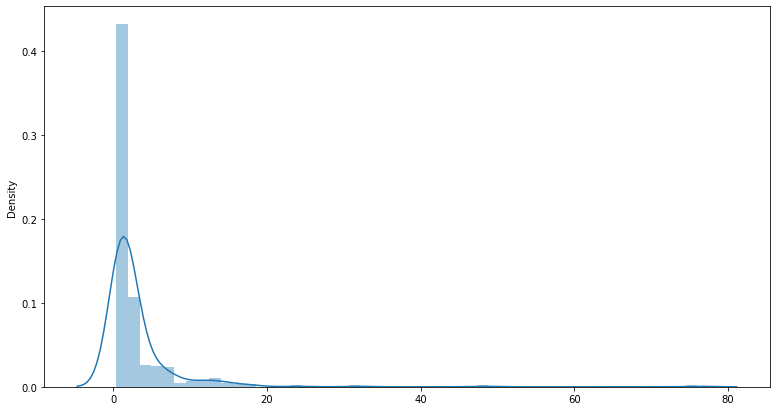

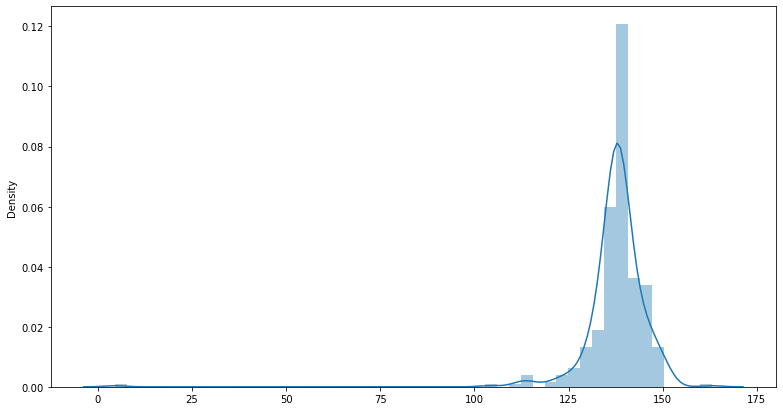

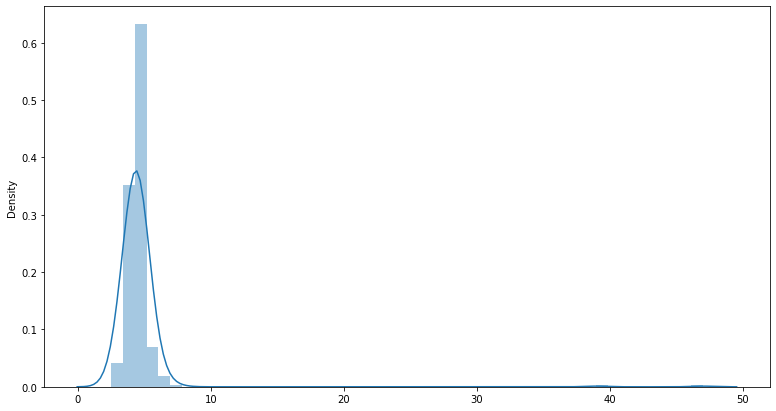

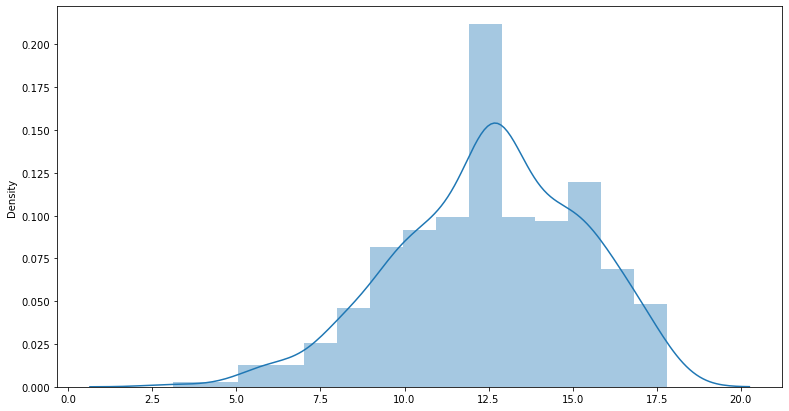

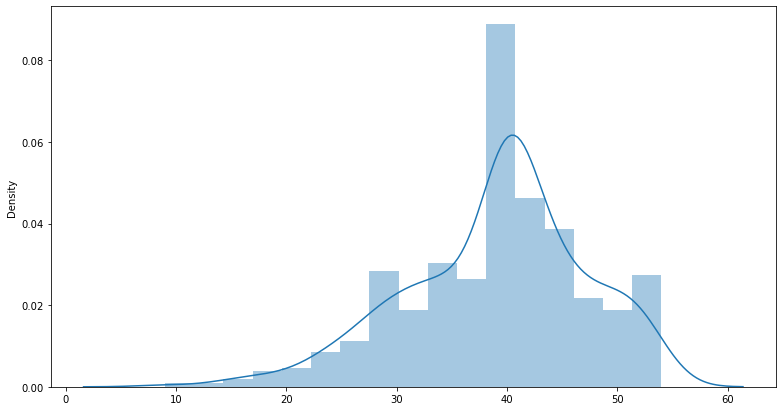

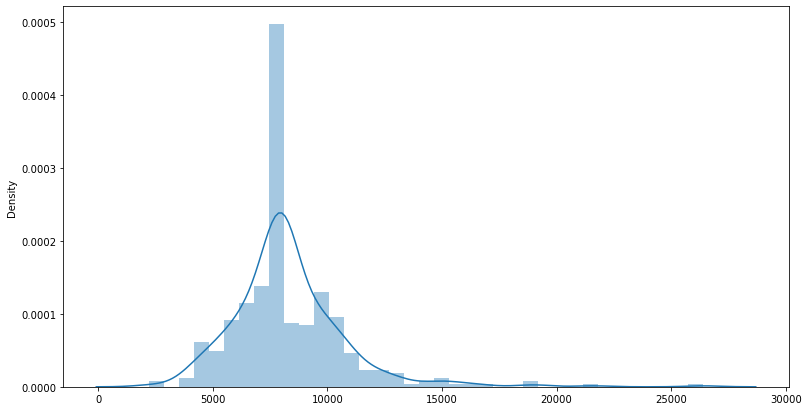

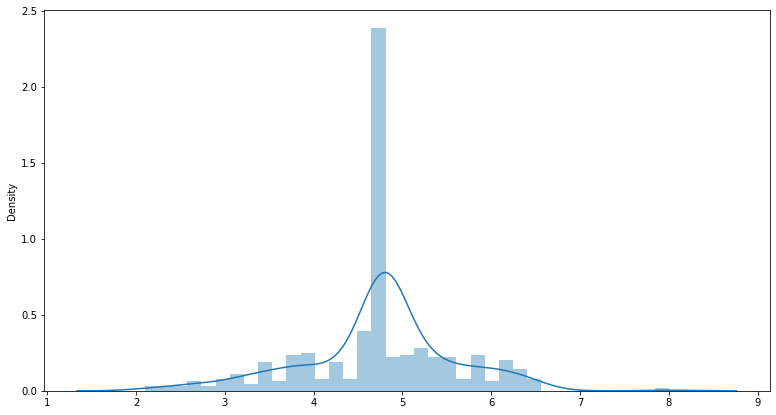

In [16]:
import matplotlib.pyplot as plt
for col in num_cols:
      fig= plt.subplots(1,1, figsize = (13,7))
      sns.distplot(x=df[col])

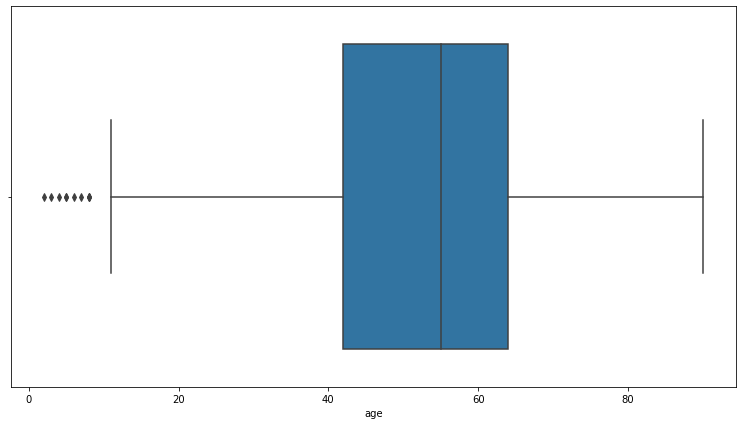

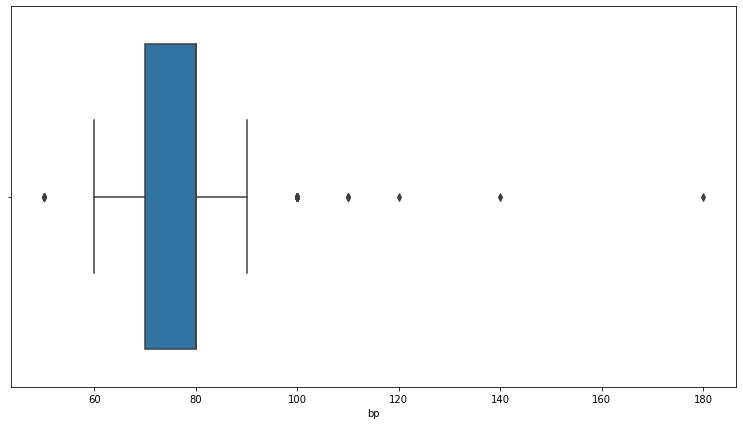

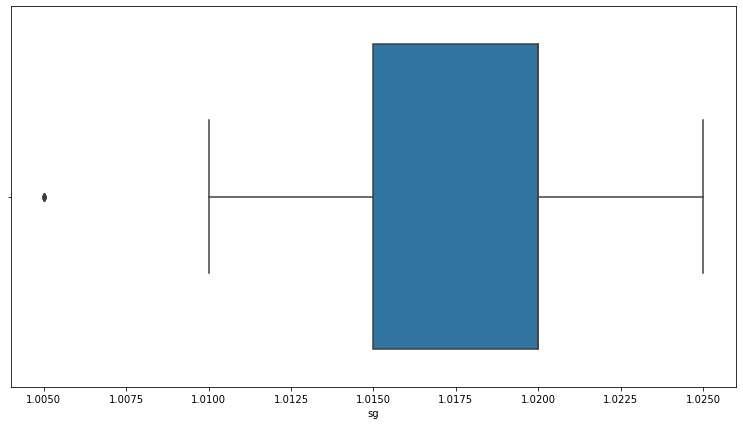

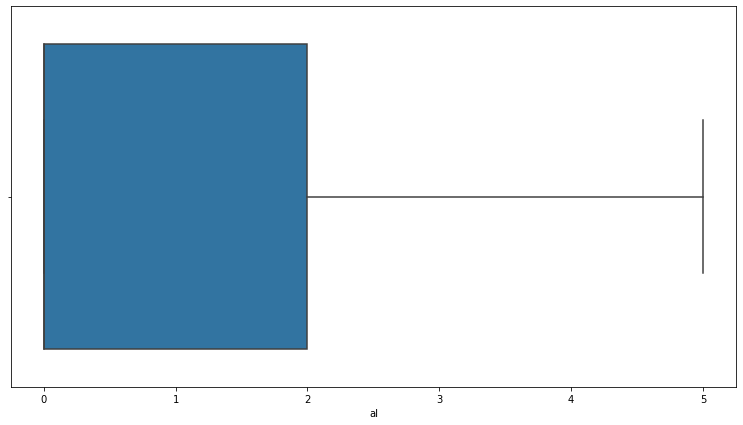

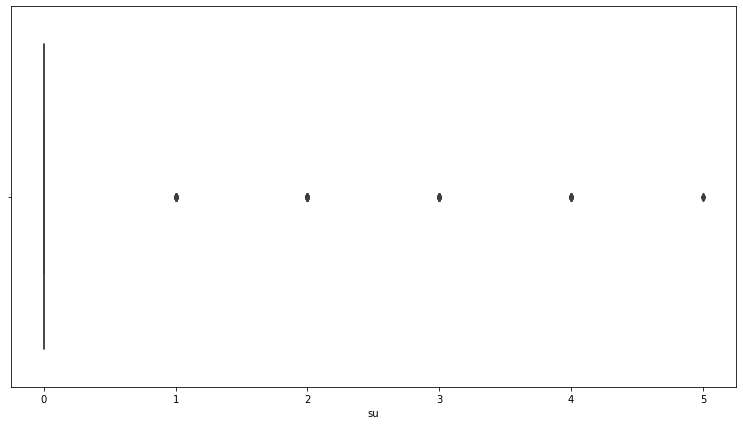

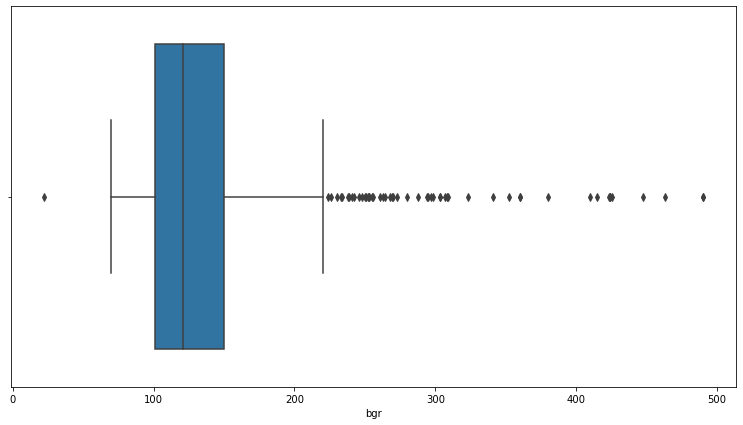

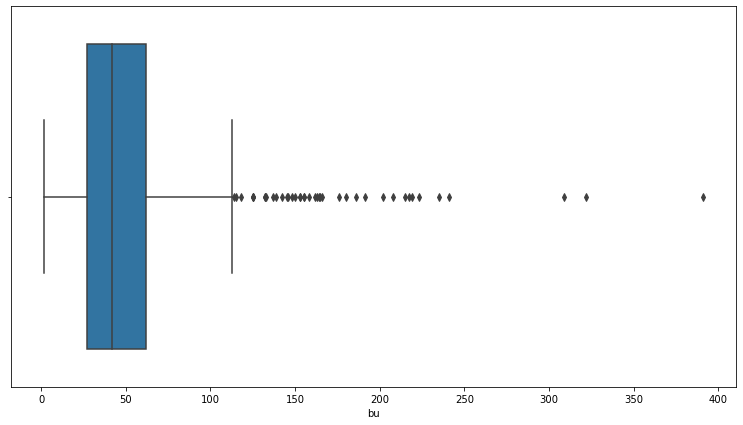

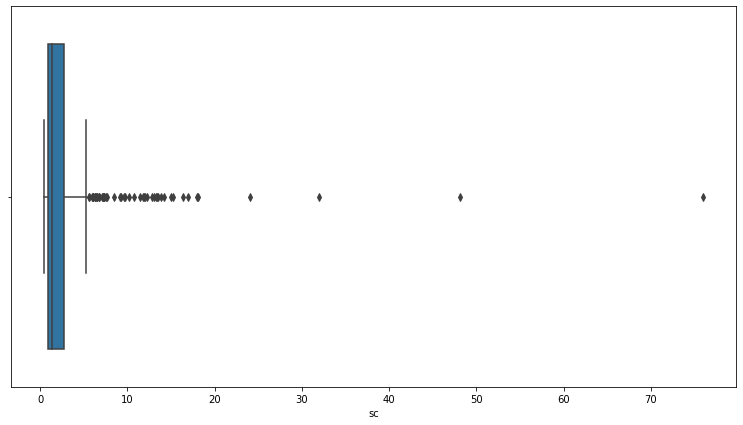

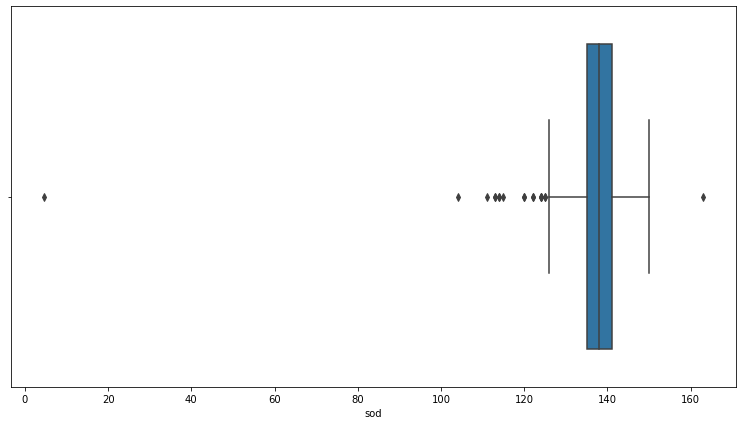

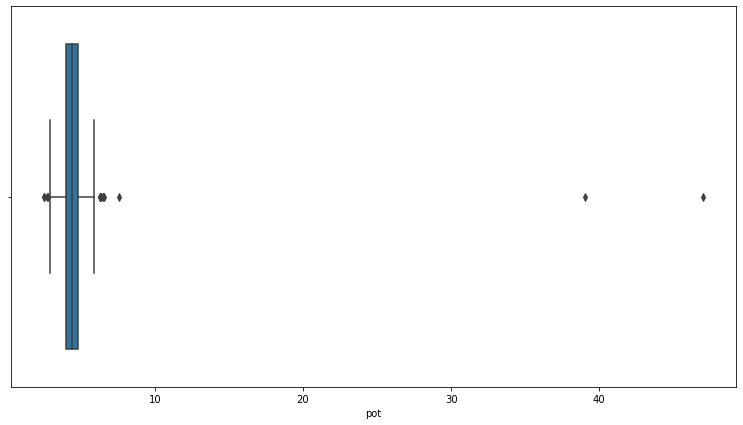

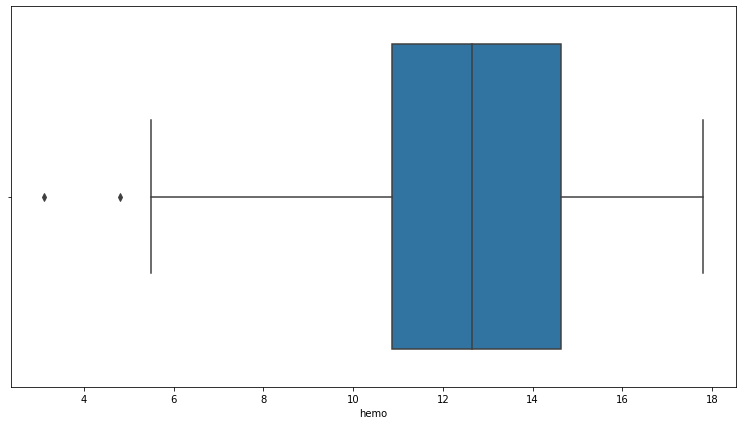

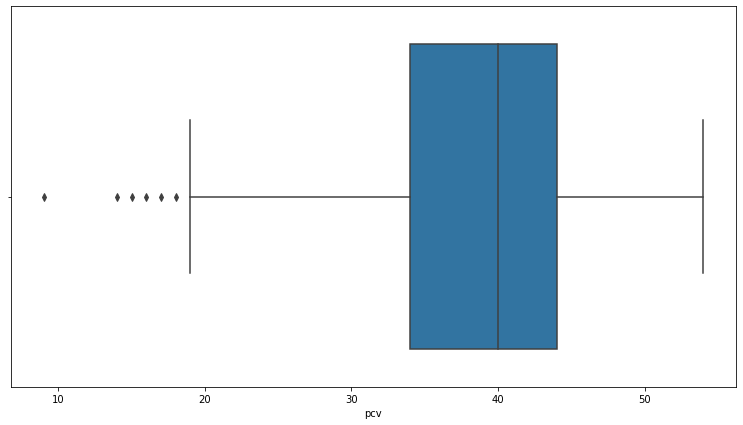

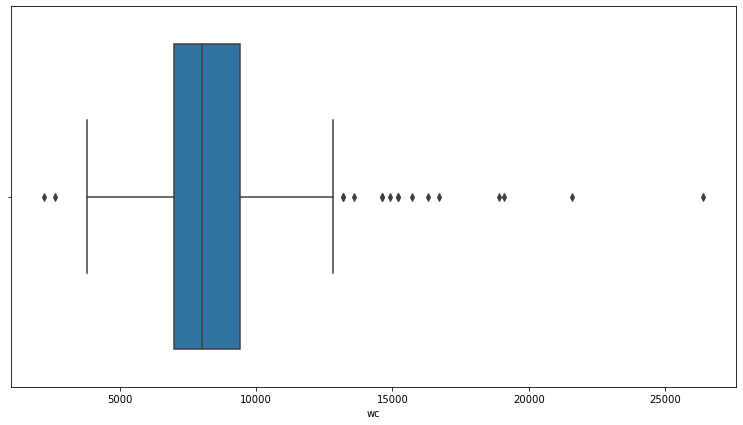

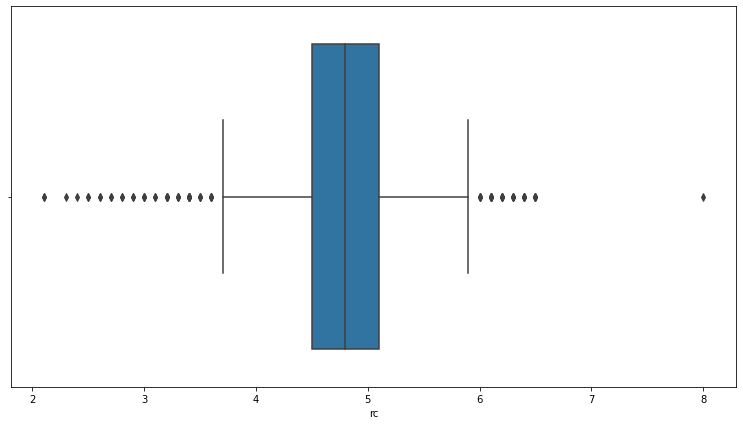

In [17]:
# outlier detection
# detecting outliers if is it present through boxplot

import matplotlib.pyplot as plt
for col in num_cols:
  fig= plt.subplots(1,1, figsize = (13,7))
  sns.boxplot(df[col], orient = 'v')
 

<AxesSubplot:xlabel='age', ylabel='bp'>

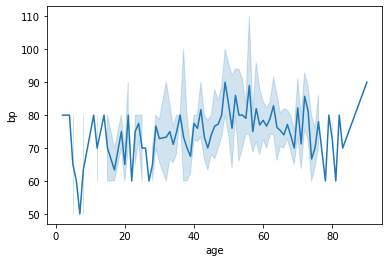

In [18]:
#bivariate analysis
sns.lineplot(df['age'],df['bp'])

<AxesSubplot:xlabel='age', ylabel='bgr'>

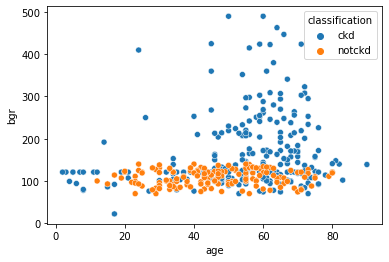

In [19]:
sns.scatterplot(df['age'],df['bgr'],hue=df["classification"])

<AxesSubplot:xlabel='bp', ylabel='bgr'>

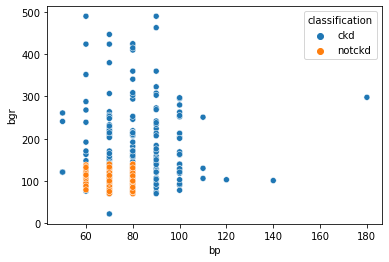

In [20]:
sns.scatterplot(df['bp'],df['bgr'],hue=df["classification"])

<AxesSubplot:xlabel='wc', ylabel='bu'>

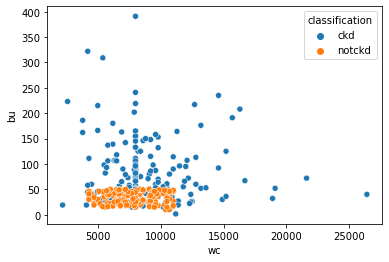

In [21]:
sns.scatterplot(df['wc'],df['bu'],hue=df["classification"])

<AxesSubplot:>

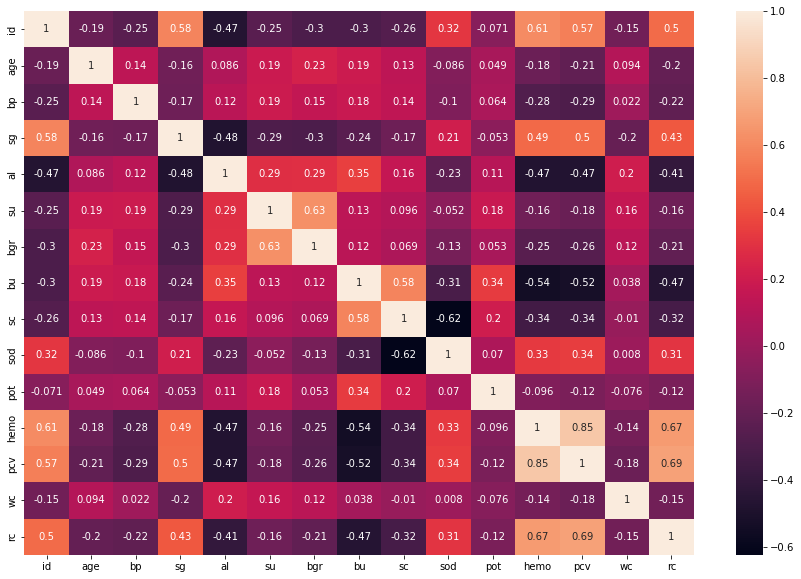

In [22]:
#multivariate analysis
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df.corr(),annot=True,ax=ax) #there is not multicolinearity

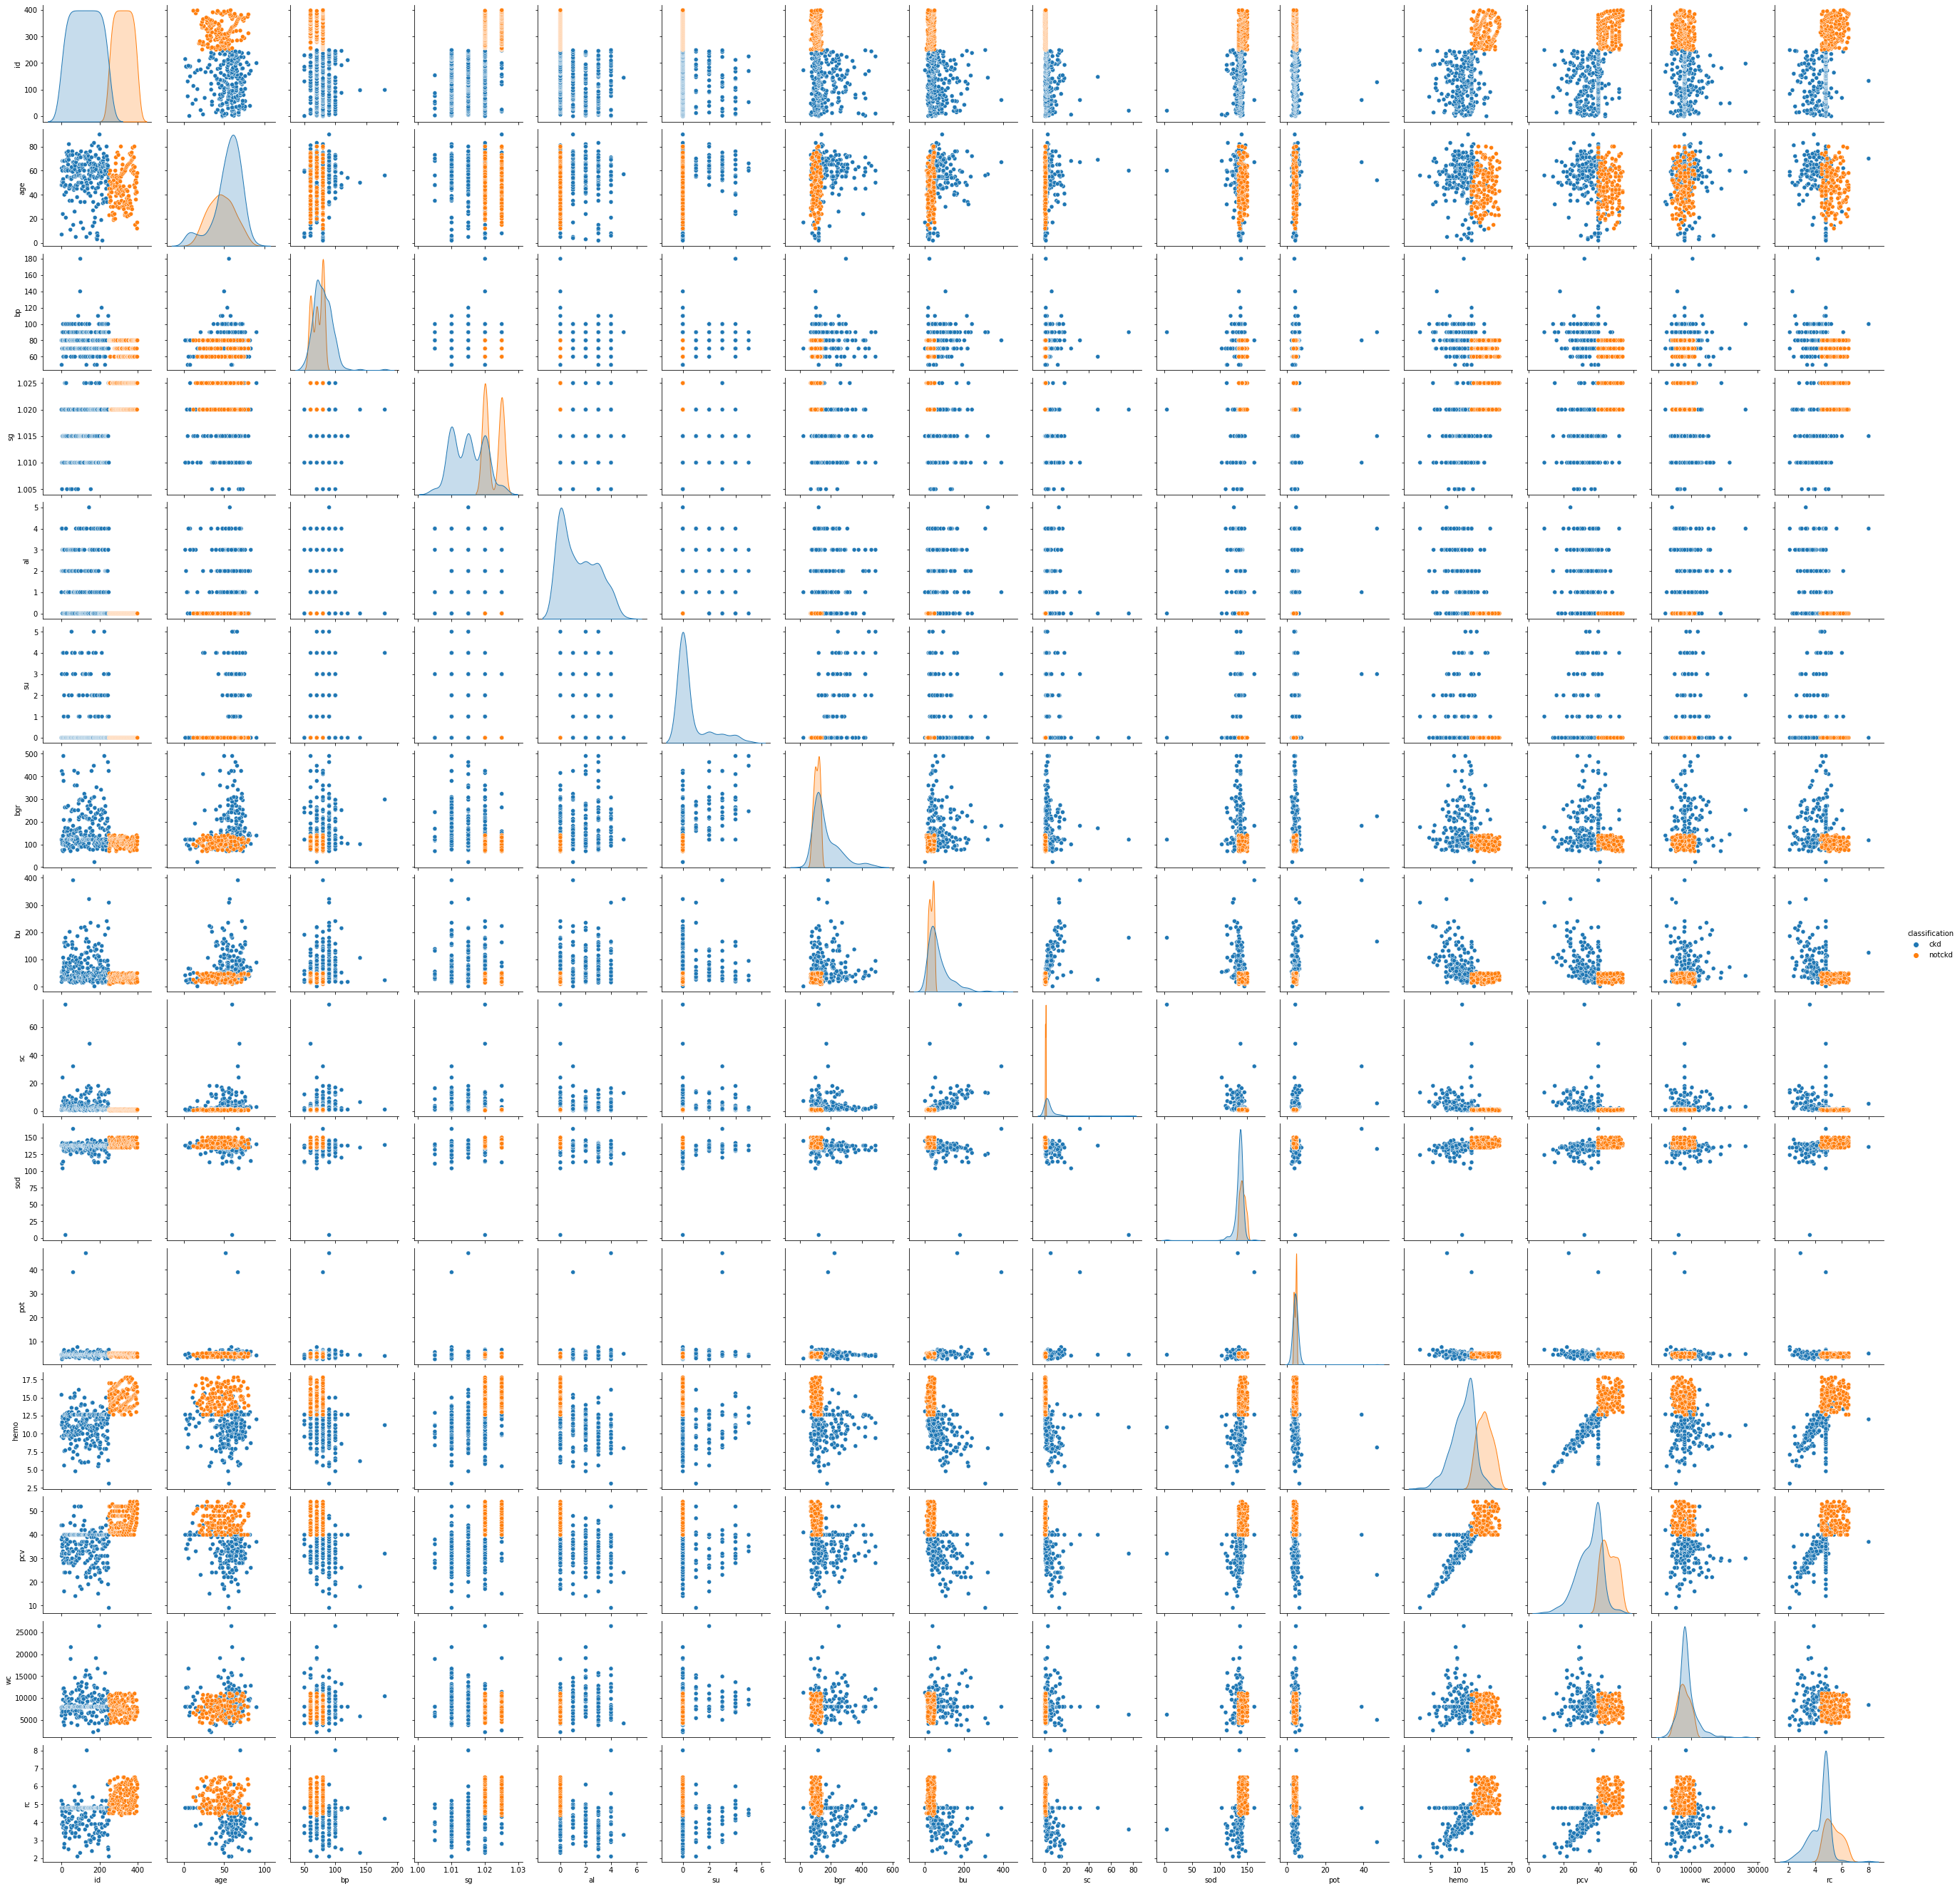

In [23]:
sns.pairplot(df,hue='classification')

In [24]:
#replacing the outliers with IQR median method

def removeOutlier(cols):
    q1=df[cols].quantile(0.25)
    q3=df[cols].quantile(0.75)
    iqr=q3-q1
    upperlimit=q3+1.5*iqr
    lowerlimit=q1-1.5*iqr
    df[cols]=np.where(df[cols]>upperlimit,df[cols].median(),df[cols])
    df[cols]=np.where(df[cols]<lowerlimit,df[cols].median(),df[cols])
    print('***************'+cols+'********************')
    print(q1,q3,iqr)
    

for cols in num_cols:
    removeOutlier(cols);

***************age********************
42.0 64.0 22.0
***************bp********************
70.0 80.0 10.0
***************sg********************
1.015 1.02 0.0050000000000001155
***************al********************
0.0 2.0 2.0
***************su********************
0.0 0.0 0.0
***************bgr********************
101.0 150.0 49.0
***************bu********************
27.0 61.75 34.75
***************sc********************
0.9 2.725 1.8250000000000002
***************sod********************
135.0 141.0 6.0
***************pot********************
4.0 4.8 0.7999999999999998
***************hemo********************
10.875 14.625 3.75
***************pcv********************
34.0 44.0 10.0
***************wc********************
6975.0 9400.0 2425.0
***************rc********************
4.5 5.1 0.5999999999999996


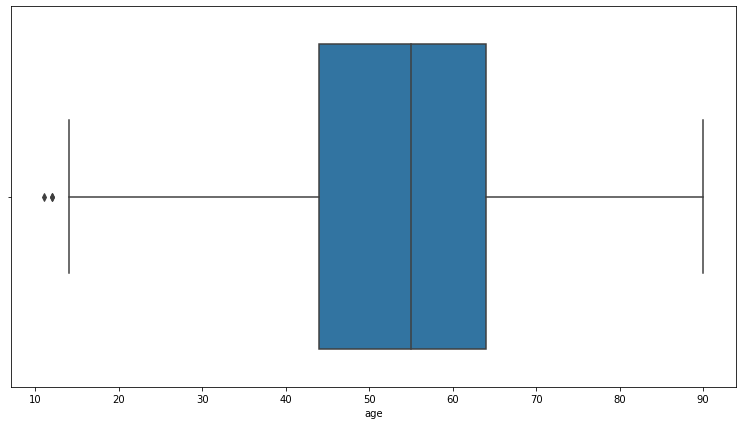

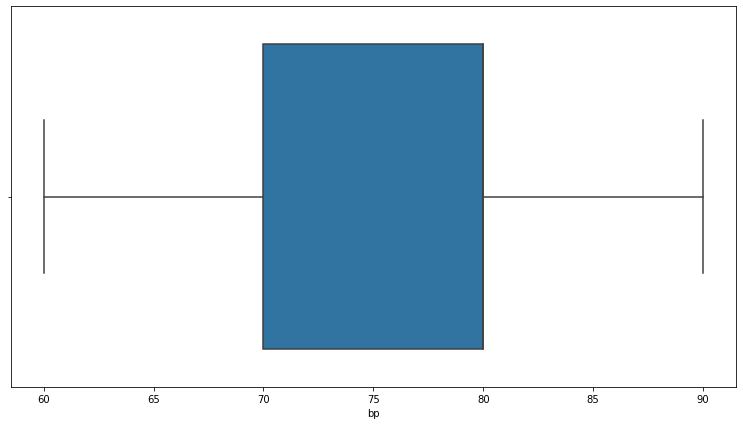

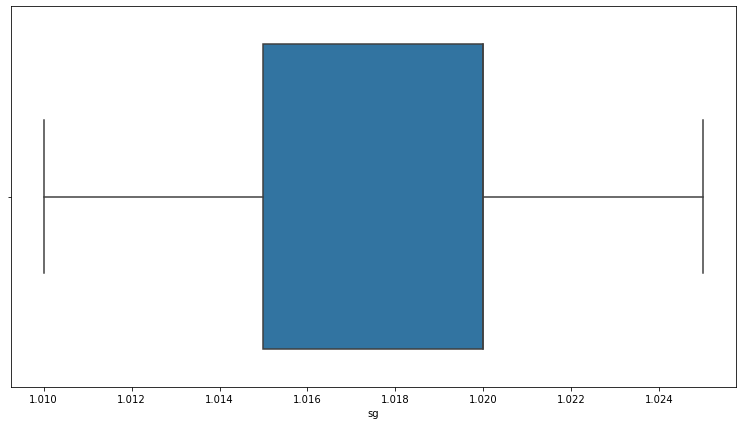

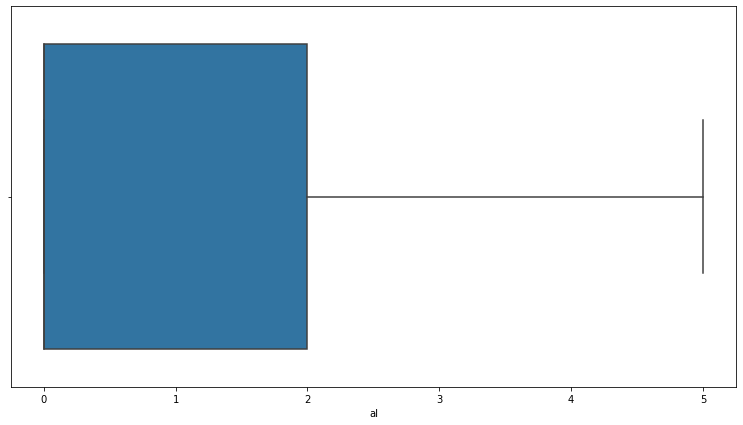

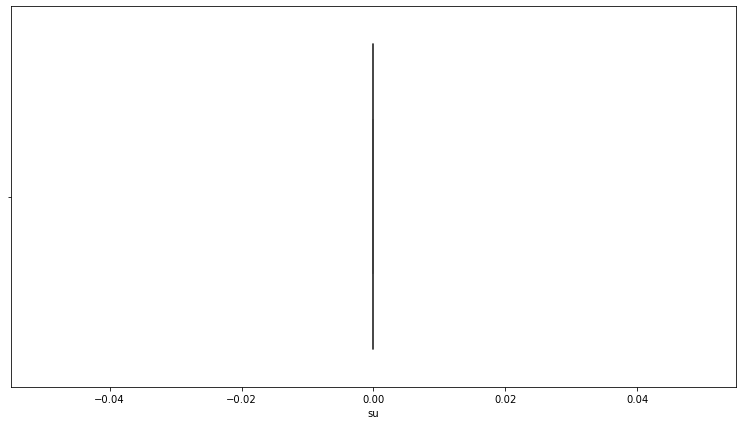

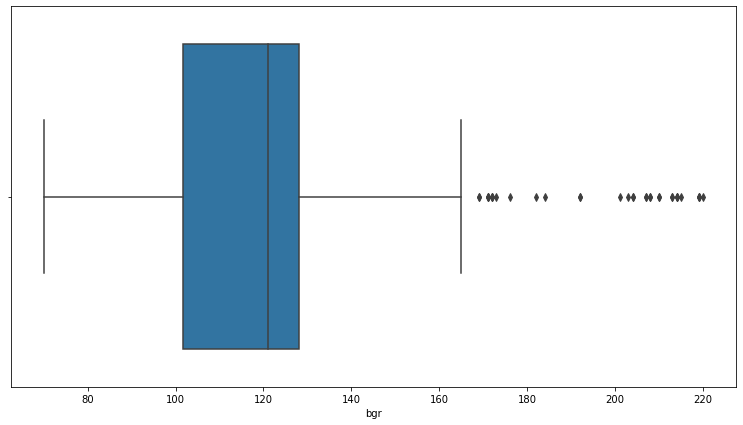

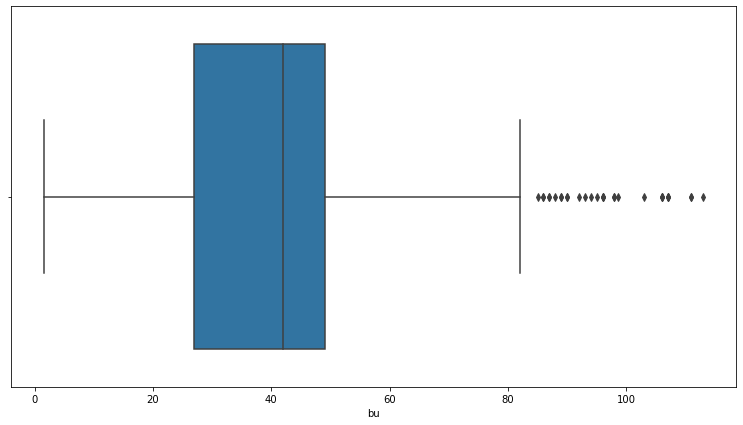

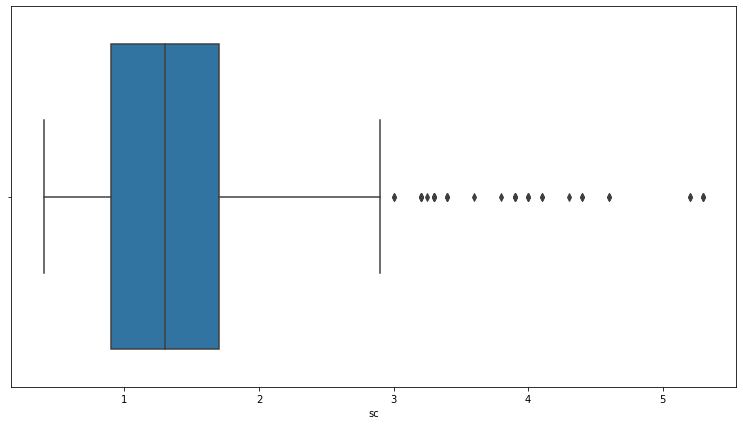

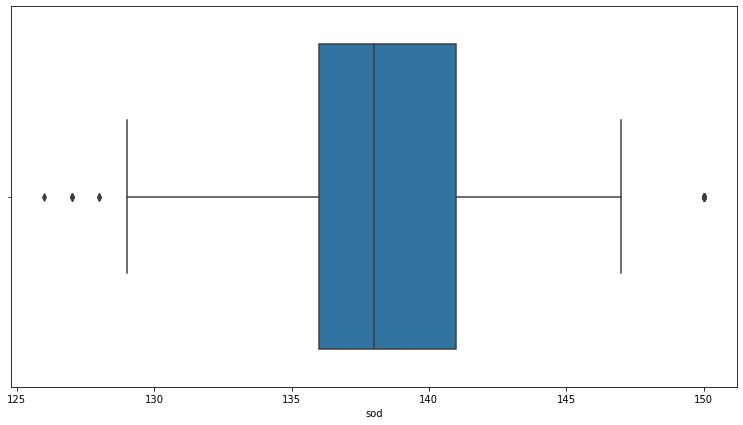

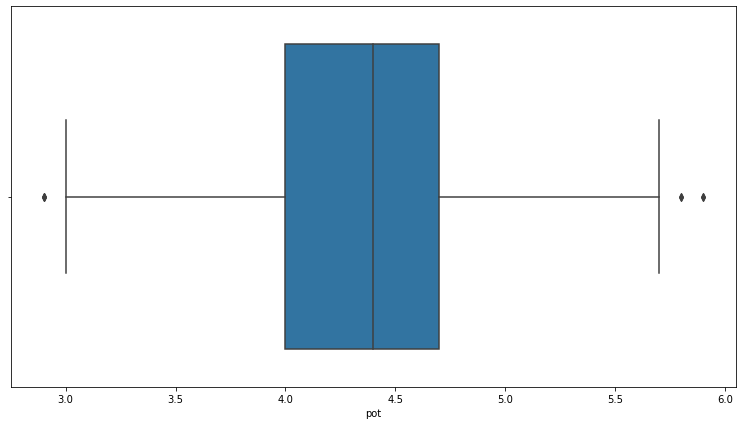

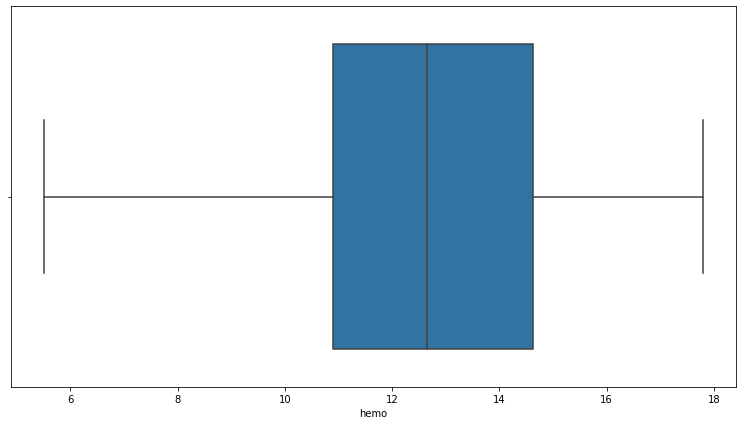

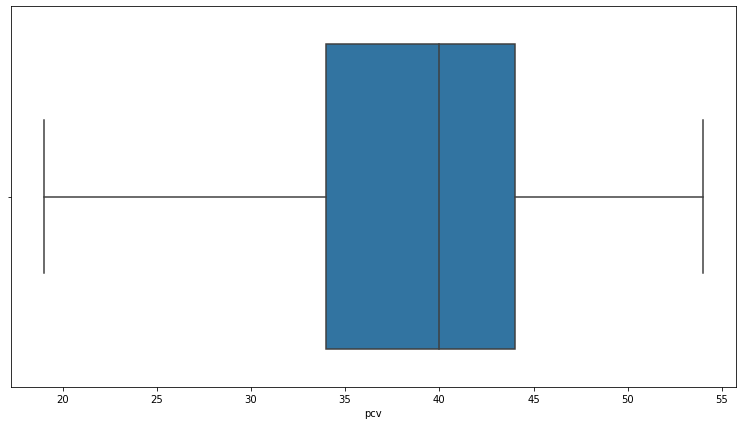

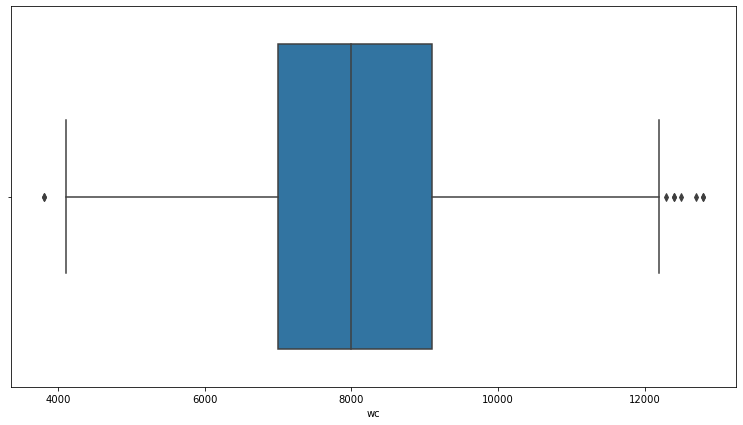

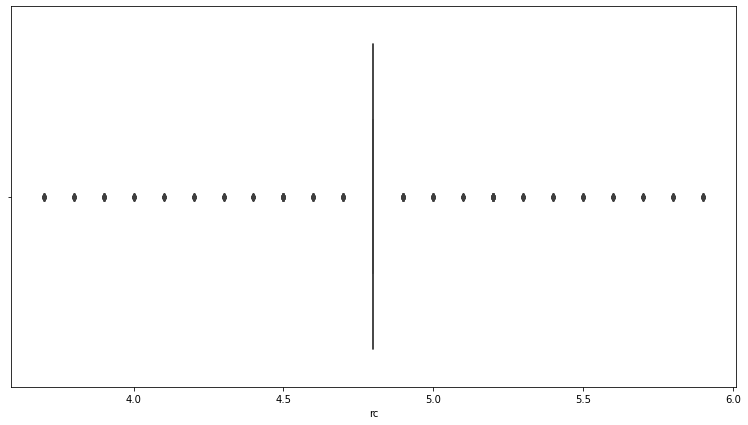

In [25]:
#checking the outliers once again with boxplot 

for col in num_cols:
  fig= plt.subplots(1,1, figsize = (13,7))
  sns.boxplot(df[col])

In [26]:
#dropping unwanted column which doesnt make any effect on prediction

df.drop(['id'],axis=1,inplace=True)
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.02,1.0,0.0,normal,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,55.0,80.0,1.02,4.0,0.0,normal,normal,notpresent,notpresent,121.0,...,38.0,6000.0,4.8,no,no,no,good,no,no,ckd
2,62.0,80.0,1.01,2.0,0.0,normal,normal,notpresent,notpresent,121.0,...,31.0,7500.0,4.8,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.02,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.01,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [27]:
#label encoding for categorical attributes

df['rbc']=df['rbc'].map({'normal':0,'abnormal':1})
df['pc']=df['pc'].map({'normal':0,'abnormal':1})
df['pcc']=df['pcc'].map({'notpresent':0,'present':1})
df['ba']=df['ba'].map({'notpresent':0,'present':1})
df['htn']=df['htn'].map({'no':0,'yes':1})
df['dm']=df['dm'].map({'no':0,'yes':1})
df['cad']=df['cad'].map({'no':0,'yes':1})
df['pe']=df['pe'].map({'no':0,'yes':1})
df['ane']=df['ane'].map({'no':0,'yes':1})
df['appet']=df['appet'].map({'good':0,'poor':1})
df['classification']=df['classification'].map({'ckd':1,'notckd':0})

In [28]:
#seperating independent variable

X=df.iloc[:,:-1]
X

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,0,0,0,0,121.0,...,15.4,44.0,7800.0,5.2,1,1,0,0,0,0
1,55.0,80.0,1.020,4.0,0.0,0,0,0,0,121.0,...,11.3,38.0,6000.0,4.8,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,0.0,0,0,0,0,121.0,...,9.6,31.0,7500.0,4.8,0,1,0,1,0,1
3,48.0,70.0,1.020,4.0,0.0,0,1,1,0,117.0,...,11.2,32.0,6700.0,3.9,1,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,0,0,0,0,106.0,...,11.6,35.0,7300.0,4.6,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,0,0,0,0,140.0,...,15.7,47.0,6700.0,4.9,0,0,0,0,0,0
396,42.0,70.0,1.025,0.0,0.0,0,0,0,0,75.0,...,16.5,54.0,7800.0,4.8,0,0,0,0,0,0
397,12.0,80.0,1.020,0.0,0.0,0,0,0,0,100.0,...,15.8,49.0,6600.0,5.4,0,0,0,0,0,0
398,17.0,60.0,1.025,0.0,0.0,0,0,0,0,114.0,...,14.2,51.0,7200.0,5.9,0,0,0,0,0,0


In [29]:
#seperating dependent variable

y=df.iloc[:,-1]
y

0      1
1      1
2      1
3      1
4      1
      ..
395    0
396    0
397    0
398    0
399    0
Name: classification, Length: 400, dtype: int64

In [30]:
#splitting the data into training and test set for model creation using train test split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=8)

X_train

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
240,65.0,70.0,1.015,1.0,0.0,0,0,0,0,203.0,...,11.40,36.0,5000.0,4.1,1,1,0,1,1,0
274,19.0,80.0,1.020,0.0,0.0,0,0,0,0,107.0,...,14.40,44.0,8000.0,4.8,0,0,0,0,0,0
78,70.0,80.0,1.020,0.0,0.0,0,0,0,0,158.0,...,10.10,30.0,8000.0,4.8,1,0,0,0,1,0
289,42.0,70.0,1.020,0.0,0.0,0,0,0,0,93.0,...,16.60,43.0,7100.0,5.3,0,0,0,0,0,0
73,55.0,80.0,1.015,2.0,0.0,1,1,0,0,129.0,...,12.65,40.0,6300.0,4.8,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,25.0,70.0,1.020,0.0,0.0,0,0,0,0,88.0,...,13.30,48.0,7000.0,4.9,0,0,0,0,0,0
136,46.0,90.0,1.020,0.0,0.0,0,0,0,0,213.0,...,9.30,40.0,8000.0,4.8,1,1,0,0,0,0
133,70.0,80.0,1.015,4.0,0.0,0,0,0,0,118.0,...,12.00,37.0,8400.0,4.8,1,0,0,0,0,0
361,29.0,80.0,1.020,0.0,0.0,0,0,0,0,70.0,...,13.70,54.0,5400.0,5.8,0,0,0,0,0,0


In [31]:
#checking the training data shape 

X_train.shape

(280, 24)

In [32]:
#using random forest classifier for first model for prediction

from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()

In [33]:
#fitting the model over training data
model.fit(X_train,y_train)

RandomForestClassifier()

In [34]:
y_pred=model.predict(X_test)

In [35]:
#diplaying predicted data
y_pred

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1])

In [36]:
#importing metrics to check the performance of the model

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [37]:
#displaying accuracy score of testing data
accuracy_score(y_test,y_pred) #higher accuracy

0.9916666666666667

<AxesSubplot:>

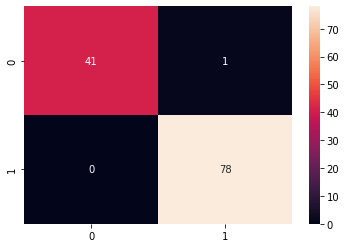

In [38]:
#confusion matrix display
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [40]:
#classification report displaying  the other performance metrics

print(classification_report(y_test,y_pred));

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        42
           1       0.99      1.00      0.99        78

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



# IBM -Deployment

In [41]:
!pip install -U ibm-watson-machine-learning

In [42]:
from ibm_watson_machine_learning import APIClient
import json

# Authenticate and set space

In [43]:
wml_credentials = {
    "apikey":"hMlTgdcKCmEIQFtugTulqjmTZOcwxD7rXdL1HWiW9zRJ",
    "url":"https://us-south.ml.cloud.ibm.com"
}

In [44]:
wml_client = APIClient(wml_credentials)

In [46]:
wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  --------------------------------------------  ------------------------
ID                                    NAME                                          CREATED
7fba65c6-6ecf-429a-911d-5b16e4848fde  PNT2022TMID21262 CKD Prediction Deploy space  2022-11-11T11:21:30.601Z
dc20d1ad-dff8-4bab-85ef-d7735fe6a6ad  ckd-deploy-space                              2022-10-29T15:22:08.943Z
80d60093-63cb-4281-b761-4fd15d460aca  iris-deploy-space                             2022-10-25T12:15:03.865Z
------------------------------------  --------------------------------------------  ------------------------


In [47]:
SPACE_ID= "7fba65c6-6ecf-429a-911d-5b16e4848fde"

In [48]:
wml_client.set.default_space(SPACE_ID)

'SUCCESS'

In [49]:
wml_client.software_specifications.list(100)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt

# Saving and Deploying the Model

In [50]:
import sklearn
sklearn.__version__

'1.0.2'

In [51]:
# Set Python Version
MODEL_NAME = 'PNT2022TMID21262 CKD Prediction'
DEPLOYMENT_NAME = 'PNT2022TMID21262 CKD Prediction'
DEMO_MODEL = model

In [53]:
# Set Python Version
software_spec_uid = wml_client.software_specifications.get_id_by_name('runtime-22.1-py3.9')

In [54]:
# Setup model meta
model_props = {
    wml_client.repository.ModelMetaNames.NAME: MODEL_NAME, 
    wml_client.repository.ModelMetaNames.TYPE: 'scikit-learn_1.0', 
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid 
}

In [56]:
#Save model

model_details = wml_client.repository.store_model(
    model=DEMO_MODEL, 
    meta_props=model_props, 
    training_data=X_train, 
    training_target=y_train
)

In [57]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'classification',
  'schemas': {'input': [{'fields': [{'name': 'age', 'type': 'float64'},
      {'name': 'bp', 'type': 'float64'},
      {'name': 'sg', 'type': 'float64'},
      {'name': 'al', 'type': 'float64'},
      {'name': 'su', 'type': 'float64'},
      {'name': 'rbc', 'type': 'int64'},
      {'name': 'pc', 'type': 'int64'},
      {'name': 'pcc', 'type': 'int64'},
      {'name': 'ba', 'type': 'int64'},
      {'name': 'bgr', 'type': 'float64'},
      {'name': 'bu', 'type': 'float64'},
      {'name': 'sc', 'type': 'float64'},
      {'name': 'sod', 'type': 'float64'},
      {'name': 'pot', 'type': 'float64'},
      {'name': 'hemo', 'type': 'float64'},
      {'name': 'pcv', 'type': 'float64'},
      {'name': 'wc', 'type': 'float64'},
      {'name': 'rc', 'type': 'float64'},
      {'name': 'htn', 'type': 'int64'},
      {'name': 'dm', 'type': 'int64'},
      {'name': 'cad', 'type': 'int64'},
      {'name': 'appet', 't

In [58]:
model_id = wml_client.repository.get_model_id(model_details)
model_id

'459f059d-6677-4692-9b3a-947b408aa8fd'

In [59]:
# Set meta
deployment_props = {
    wml_client.deployments.ConfigurationMetaNames.NAME:DEPLOYMENT_NAME, 
    wml_client.deployments.ConfigurationMetaNames.ONLINE: {}
}

In [60]:
# Deploy
deployment = wml_client.deployments.create(
    artifact_uid=model_id, 
    meta_props=deployment_props 
)



#######################################################################################

Synchronous deployment creation for uid: '459f059d-6677-4692-9b3a-947b408aa8fd' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='4bb20f2e-e060-412e-875e-a336e199f1aa'
------------------------------------------------------------------------------------------------


